# 01_outcome_distribution_exploration.ipynb

In [5]:
import pandas as pd
from pathlib import Path

# Read in data from CSV files
# Assuming the CSV files are located in a 'data/raw' directory relative to this script's location
# Adjust the path as necessary based on your project structure
path = Path.cwd().parent.parent
img = pd.read_csv(path / "data" / "raw" / "imagingFeatures.csv")
clin = pd.read_csv(path / "data" / "raw" / "clinicalData_clean.csv")
clin.columns

Index(['Unnamed: 0', 'Patient ID', 'Days to MRI (From the Date of Diagnosis)',
       'Manufacturer', 'Manufacturer Model Name', 'Scan Options',
       'Field Strength (Tesla)', 'Patient Position During MRI',
       'Image Position of Patient', 'Contrast Agent',
       'Contrast Bolus Volume (mL)', 'TR (Repetition Time)', 'TE (Echo Time)',
       'Acquisition Matrix', 'Slice Thickness', 'Rows', 'Columns',
       'Reconstruction Diameter', 'Flip Angle \r\n',
       'FOV Computed (Field of View) in cm', 'Date of Birth (Days)',
       'Menopause (at diagnosis)', 'Race and Ethnicity',
       'Metastatic at Presentation (Outside of Lymph Nodes)', 'ER', 'PR',
       'HER2', 'Mol Subtype', 'Oncotype score', 'Staging(Tumor Size)# [T]',
       'Staging(Nodes)#(Nx replaced by -1)[N]',
       'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'TumorGradeT',
       'TumorGradeN', 'TumorGradeM', 'Nottingham grade', 'Histologic type',
       'Tumor Location', 'Position', 'Bilateral Information',
       

## Distribution of molecular subtype

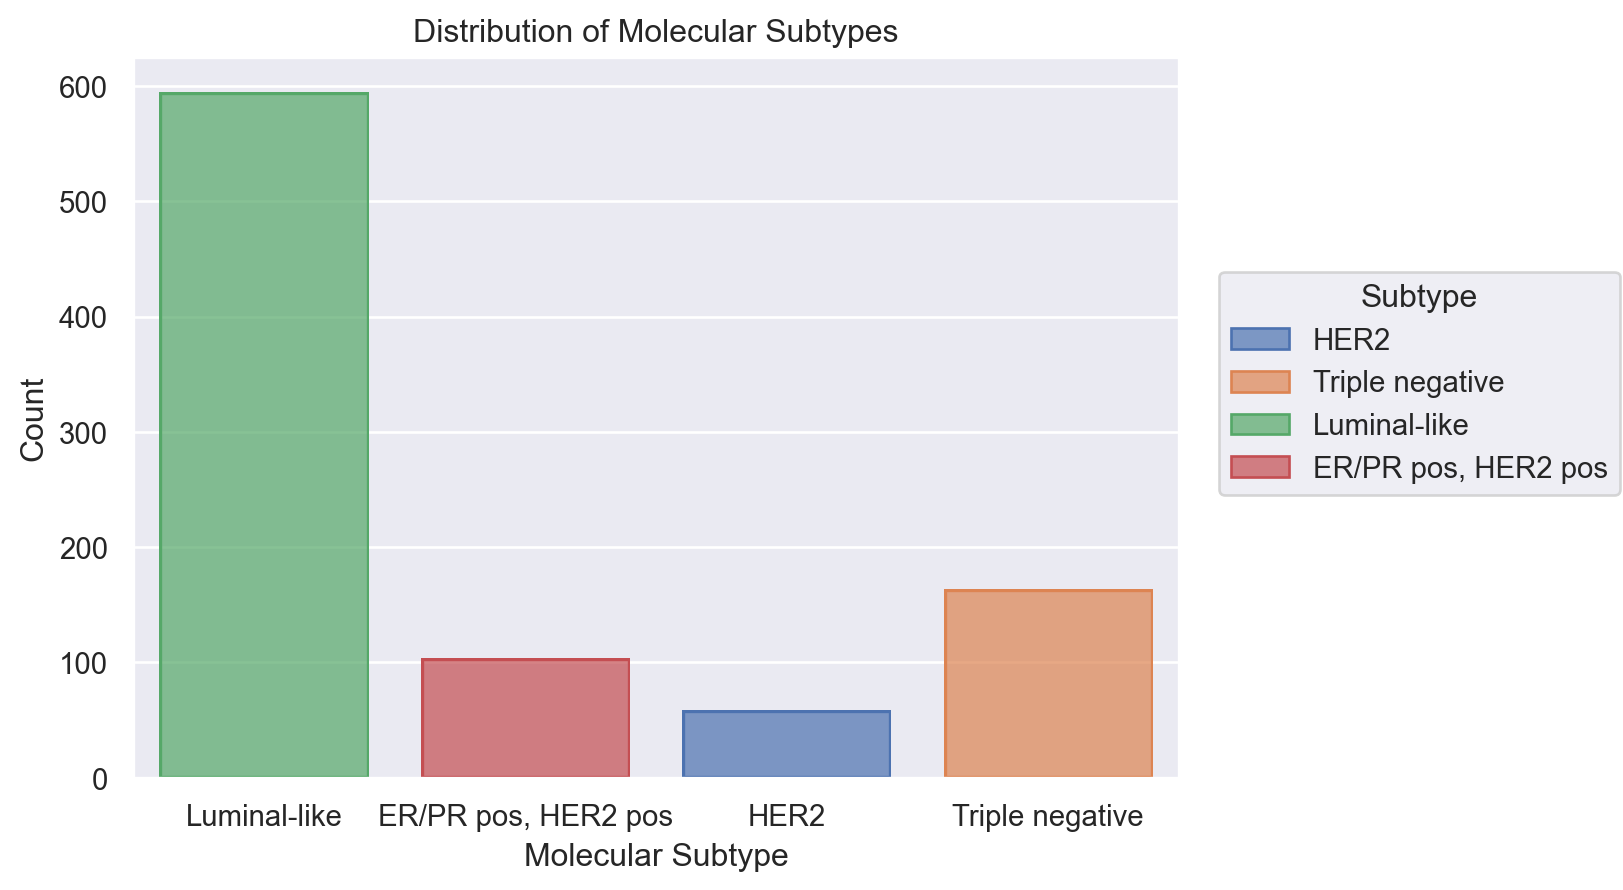

In [21]:
import seaborn.objects as so

mol_subtype_map = {
    0: 'Luminal-like',
    1: 'ER/PR pos, HER2 pos',
    2: 'HER2',
    3: 'Triple negative'
}

clin['Mol Subtype Label'] = clin['Mol Subtype'].map(mol_subtype_map)
clin['Mol Subtype Label'] = pd.Categorical(clin['Mol Subtype Label'], categories=mol_subtype_map.values())

# Create graph for categorical variable, molecular subtype based on clinical data
TARGET = 'Mol Subtype Label'
(
    so.Plot(clin,
        x=TARGET,
        color=TARGET)
    .add(so.Bar(), so.Hist(stat='count'))
    .label(x='Molecular Subtype', y='Count', color='Subtype', title='Distribution of Molecular Subtypes')
)
